In [1]:
import pandas as pd
import numpy as np

# --- 1. 데이터 불러오기 및 기본 전처리 ---
df_orig = pd.read_csv('Location1.csv')
df_orig['Time'] = pd.to_datetime(df_orig['Time'])
df_orig.set_index('Time', inplace=True)
df_orig.rename(columns={'Power': 'target'}, inplace=True)

df = df_orig.copy() # 원본은 보존하고 복사본으로 작업

print("--- 고급 특성 공학 및 예보 데이터 시뮬레이션 시작 ---")

# --- 2. 고급 특성 공학 (Lag & Rolling) ---

# Lag Features: 과거의 '발전량'을 현재의 특성으로 가져옴
lags = [1, 2, 24]
for lag in lags:
    df[f'target_lag_{lag}'] = df['target'].shift(lag)

# Rolling Statistics: 과거 일정 기간 동안의 통계치를 특성으로 가져옴
rolling_windows = [6, 12, 24]
for window in rolling_windows:
    df[f'windspeed_100m_roll_mean_{window}h'] = df['windspeed_100m'].rolling(window=window).mean()
    df[f'windspeed_100m_roll_std_{window}h'] = df['windspeed_100m'].rolling(window=window).std()

print(f"Lag, Rolling 특성 추가 후 Shape: {df.shape}")


# --- 3. 예보 데이터 시뮬레이션 ---
# 1시간 뒤의 실제 날씨를 "완벽한 1시간 예보"로 가정하고 특성으로 추가
weather_features = [col for col in df.columns if 'target' not in col]

for feature in weather_features:
    # 현재 행에 1시간 뒤(shift(-1))의 날씨 데이터를 가져옴
    df[f'{feature}_forecast_1h'] = df[feature].shift(-1)

print(f"예보 특성 추가 후 Shape: {df.shape}")


# --- 4. 결측치(NaN) 제거 ---
# shift, rolling 작업으로 인해 생긴 맨 처음과 맨 마지막의 결측치들을 제거
original_rows = df.shape[0]
df.dropna(inplace=True)
print(f"\n결측치 제거 완료. {original_rows - df.shape[0]}개의 행이 제거되었습니다.")


# --- 5. 최종 결과 확인 ---
print("\n--- 최종 생성된 데이터 정보 ---")
# 컬럼이 많으므로 verbose=True로 모든 컬럼 확인
df.info(verbose=True)

print("\n최종 데이터 샘플:")
df.head()

--- 고급 특성 공학 및 예보 데이터 시뮬레이션 시작 ---
Lag, Rolling 특성 추가 후 Shape: (43800, 18)
예보 특성 추가 후 Shape: (43800, 32)

결측치 제거 완료. 25개의 행이 제거되었습니다.

--- 최종 생성된 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43775 entries, 2017-01-03 00:00:00 to 2021-12-31 22:00:00
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   temperature_2m                            43775 non-null  float64
 1   relativehumidity_2m                       43775 non-null  int64  
 2   dewpoint_2m                               43775 non-null  float64
 3   windspeed_10m                             43775 non-null  float64
 4   windspeed_100m                            43775 non-null  float64
 5   winddirection_10m                         43775 non-null  int64  
 6   winddirection_100m                        43775 non-null  int64  
 7   windgusts_10m                             43775 non-nul

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,target,target_lag_1,...,windspeed_100m_forecast_1h,winddirection_10m_forecast_1h,winddirection_100m_forecast_1h,windgusts_10m_forecast_1h,windspeed_100m_roll_mean_6h_forecast_1h,windspeed_100m_roll_std_6h_forecast_1h,windspeed_100m_roll_mean_12h_forecast_1h,windspeed_100m_roll_std_12h_forecast_1h,windspeed_100m_roll_mean_24h_forecast_1h,windspeed_100m_roll_std_24h_forecast_1h
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00,36.1,96,35.1,2.94,5.60,72,92,5.5,0.1805,0.2031,...,5.77,113.0,118.0,6.1,5.481667,1.282660,5.476667,0.937408,5.192083,1.157970
2017-01-03 01:00:00,36.6,97,35.8,2.82,5.77,113,118,6.1,0.1579,0.1805,...,3.39,111.0,135.0,5.2,5.528333,1.180109,5.358333,1.104033,5.217500,1.108357
2017-01-03 02:00:00,36.6,99,36.2,1.39,3.39,111,135,5.2,0.1353,0.1579,...,2.42,30.0,83.0,3.0,5.040000,1.741402,5.158333,1.390610,5.206250,1.136148
2017-01-03 03:00:00,36.6,99,36.4,1.61,2.42,30,83,3.0,0.1127,0.1353,...,1.63,20.0,43.0,3.1,4.160000,1.931176,4.833333,1.713987,5.089583,1.344061
2017-01-03 04:00:00,36.3,100,36.2,1.17,1.63,20,43,3.1,0.0901,0.1127,...,2.82,56.0,67.0,2.9,3.605000,1.710821,4.562500,1.757044,4.974167,1.416216


In [2]:
from sklearn.preprocessing import StandardScaler

# --- 6. 데이터 분할 ---
n = len(df)
train_end = int(n * 0.7)
val_end = int(n * (0.7 + 0.15))

# .copy()를 사용하여 SettingWithCopyWarning 방지
train_df = df.iloc[:train_end].copy()
val_df = df.iloc[train_end:val_end].copy()
test_df = df.iloc[val_end:].copy()

print("--- 데이터 분할 결과 ---")
print(f"Train Set: {train_df.shape}")
print(f"Validation Set: {val_df.shape}")
print(f"Test Set: {test_df.shape}")


# --- 7. 데이터 스케일링 ---
features = [col for col in train_df.columns if col != 'target']
scaler = StandardScaler()

print(f"\n--- 총 {len(features)}개의 Feature를 스케일링합니다. ---")

# Train 데이터에 fit 및 transform 수행
train_df[features] = scaler.fit_transform(train_df[features])

# Val, Test 데이터에는 transform만 수행
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

print("\n--- 데이터 스케일링 완료 ---")
print("스케일링 후 Train 데이터 샘플:")
# 컬럼이 많아 일부만 출력될 수 있습니다.
pd.set_option('display.max_columns', None) # 모든 컬럼을 보려면 이 옵션을 활성화
print(train_df.head())

--- 데이터 분할 결과 ---
Train Set: (30642, 32)
Validation Set: (6566, 32)
Test Set: (6567, 32)

--- 총 31개의 Feature를 스케일링합니다. ---

--- 데이터 스케일링 완료 ---
스케일링 후 Train 데이터 샘플:
                     temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-03 00:00:00       -0.530594             1.409365    -0.110616   
2017-01-03 01:00:00       -0.504992             1.468561    -0.073801   
2017-01-03 02:00:00       -0.504992             1.586952    -0.052764   
2017-01-03 03:00:00       -0.504992             1.586952    -0.042245   
2017-01-03 04:00:00       -0.520353             1.646147    -0.052764   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-03 00:00:00      -0.411546       -0.272358          -1.325789   
2017-01-03 01:00:00      -0.483548       -0.209372          -0.905555   
2017-01-03 02:00:00      -1.341

In [3]:
import numpy as np

# 시계열 데이터를 입력(X)과 출력(y) 시퀀스로 변환하는 함수
def create_sequences(input_data, sequence_length, prediction_horizon):
    X, y = [], []
    features = [col for col in input_data.columns if col != 'target']
    data_len = len(input_data)
    
    for i in range(data_len - sequence_length - prediction_horizon + 1):
        # 입력 시퀀스
        sequence = input_data.iloc[i:(i + sequence_length)]
        
        # 정답(라벨)
        label_position = i + sequence_length + prediction_horizon - 1
        label = input_data.iloc[label_position]['target']
        
        X.append(sequence[features].values)
        y.append(label)
        
    return np.array(X), np.array(y)

# 시퀀스 길이와 예측 시점 정의
SEQUENCE_LENGTH = 24 * 7 # 7일 (168시간)
PREDICTION_HORIZON = 1   # 1시간 뒤

# 각 데이터셋을 시퀀스 형태로 변환
X_train, y_train = create_sequences(train_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_val, y_val = create_sequences(val_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_test, y_test = create_sequences(test_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)

# 변환된 데이터의 형태(shape) 확인
print("--- 시퀀스 데이터 생성 완료 ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

--- 시퀀스 데이터 생성 완료 ---
X_train shape: (30474, 168, 31)
y_train shape: (30474,)
X_val shape: (6398, 168, 31)
y_val shape: (6398,)
X_test shape: (6399, 168, 31)
y_test shape: (6399,)


In [4]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# --- 8. PyTorch 데이터로더 생성 ---
BATCH_SIZE = 64

# NumPy 배열을 PyTorch Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# TensorDataset 및 DataLoader 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("--- PyTorch DataLoader 준비 완료 ---")


# --- 9. LSTM 모델 정의 및 초기화 ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 하이퍼파라미터 (INPUT_SIZE가 매우 커짐)
INPUT_SIZE = X_train.shape[2]
HIDDEN_SIZE = 128 # 더 많은 feature를 처리하기 위해 은닉층 크기를 늘리는 것을 고려할 수 있습니다.
NUM_LAYERS = 2
OUTPUT_SIZE = 1
LEARNING_RATE = 0.001

# LSTM 모델 클래스
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

# 모델, 손실 함수, 옵티마이저 초기화
model_ultimate = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_ultimate.parameters(), lr=LEARNING_RATE)


print(f"\n--- 최종 모델 준비 완료 (Device: {device}) ---")
print(f"입력 Feature 수: {INPUT_SIZE}")
print("모델 구조:")
print(model_ultimate)

--- PyTorch DataLoader 준비 완료 ---

--- 최종 모델 준비 완료 (Device: cuda) ---
입력 Feature 수: 31
모델 구조:
LSTMModel(
  (lstm): LSTM(31, 128, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


--- 최종 모델(LSTM) 학습 시작 ---


Epoch 1/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 129.84it/s, loss=0.00625]


Epoch 1/50 | Train Loss: 0.009306 | Val Loss: 0.002965


Epoch 2/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 147.76it/s, loss=0.00392]


Epoch 2/50 | Train Loss: 0.003114 | Val Loss: 0.001839


Epoch 3/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 146.93it/s, loss=0.00406] 


Epoch 3/50 | Train Loss: 0.002342 | Val Loss: 0.001354


Epoch 4/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 146.94it/s, loss=0.00114] 


Epoch 4/50 | Train Loss: 0.001997 | Val Loss: 0.001238


Epoch 5/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 146.91it/s, loss=0.000916]


Epoch 5/50 | Train Loss: 0.001719 | Val Loss: 0.001194


Epoch 6/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 146.86it/s, loss=0.000982]


Epoch 6/50 | Train Loss: 0.001573 | Val Loss: 0.001057


Epoch 7/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 147.24it/s, loss=0.000803]


Epoch 7/50 | Train Loss: 0.001464 | Val Loss: 0.001021


Epoch 8/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 146.93it/s, loss=0.00244] 


Epoch 8/50 | Train Loss: 0.001393 | Val Loss: 0.000930


Epoch 9/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 148.13it/s, loss=0.000509]


Epoch 9/50 | Train Loss: 0.001310 | Val Loss: 0.001047


Epoch 10/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 147.69it/s, loss=0.00575] 


Epoch 10/50 | Train Loss: 0.001240 | Val Loss: 0.000825


Epoch 11/50 [Train]: 100%|██████████| 477/477 [00:03<00:00, 136.43it/s, loss=0.00133] 


Epoch 11/50 | Train Loss: 0.001190 | Val Loss: 0.000887


Epoch 12/50 [Train]: 100%|██████████| 477/477 [00:08<00:00, 57.28it/s, loss=0.00182] 


Epoch 12/50 | Train Loss: 0.001152 | Val Loss: 0.001246


Epoch 13/50 [Train]: 100%|██████████| 477/477 [00:09<00:00, 50.56it/s, loss=0.00149] 


Epoch 13/50 | Train Loss: 0.001138 | Val Loss: 0.000827


Epoch 14/50 [Train]: 100%|██████████| 477/477 [00:09<00:00, 50.43it/s, loss=0.00202] 


Epoch 14/50 | Train Loss: 0.001080 | Val Loss: 0.000782


Epoch 15/50 [Train]: 100%|██████████| 477/477 [00:09<00:00, 49.04it/s, loss=0.000259]


Epoch 15/50 | Train Loss: 0.001049 | Val Loss: 0.000721


Epoch 16/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 46.71it/s, loss=0.000403]


Epoch 16/50 | Train Loss: 0.001010 | Val Loss: 0.000767


Epoch 17/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 43.41it/s, loss=0.000485]


Epoch 17/50 | Train Loss: 0.000994 | Val Loss: 0.000937


Epoch 18/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 46.88it/s, loss=0.000457]


Epoch 18/50 | Train Loss: 0.000985 | Val Loss: 0.000871


Epoch 19/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 44.66it/s, loss=0.000539]


Epoch 19/50 | Train Loss: 0.000960 | Val Loss: 0.000750


Epoch 20/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 46.61it/s, loss=0.000619]


Epoch 20/50 | Train Loss: 0.000934 | Val Loss: 0.000691


Epoch 21/50 [Train]: 100%|██████████| 477/477 [00:11<00:00, 43.04it/s, loss=0.000854]


Epoch 21/50 | Train Loss: 0.000920 | Val Loss: 0.000704


Epoch 22/50 [Train]: 100%|██████████| 477/477 [00:11<00:00, 42.41it/s, loss=0.00152] 


Epoch 22/50 | Train Loss: 0.000899 | Val Loss: 0.000655


Epoch 23/50 [Train]: 100%|██████████| 477/477 [00:12<00:00, 39.19it/s, loss=0.000315]


Epoch 23/50 | Train Loss: 0.000918 | Val Loss: 0.000696


Epoch 24/50 [Train]: 100%|██████████| 477/477 [00:11<00:00, 42.28it/s, loss=0.00151] 


Epoch 24/50 | Train Loss: 0.000877 | Val Loss: 0.000719


Epoch 25/50 [Train]: 100%|██████████| 477/477 [00:11<00:00, 43.07it/s, loss=0.000547]


Epoch 25/50 | Train Loss: 0.000842 | Val Loss: 0.000743


Epoch 26/50 [Train]: 100%|██████████| 477/477 [00:11<00:00, 40.95it/s, loss=0.000384]


Epoch 26/50 | Train Loss: 0.000863 | Val Loss: 0.000794


Epoch 27/50 [Train]: 100%|██████████| 477/477 [00:10<00:00, 45.48it/s, loss=0.00429] 


Epoch 27/50 | Train Loss: 0.000838 | Val Loss: 0.000687
Early stopping triggered.

--- 학습 종료 (총 학습 시간: 218.08초) ---
최적 모델 'best_model_ultimate.pth' 로드 완료.


[Final Test]: 100%|██████████| 100/100 [00:00<00:00, 134.38it/s]



--- 최종 모델 최종 성능 평가 결과 ---
MAE: 0.0155
RMSE: 0.0251
R-squared (결정 계수): 0.9924


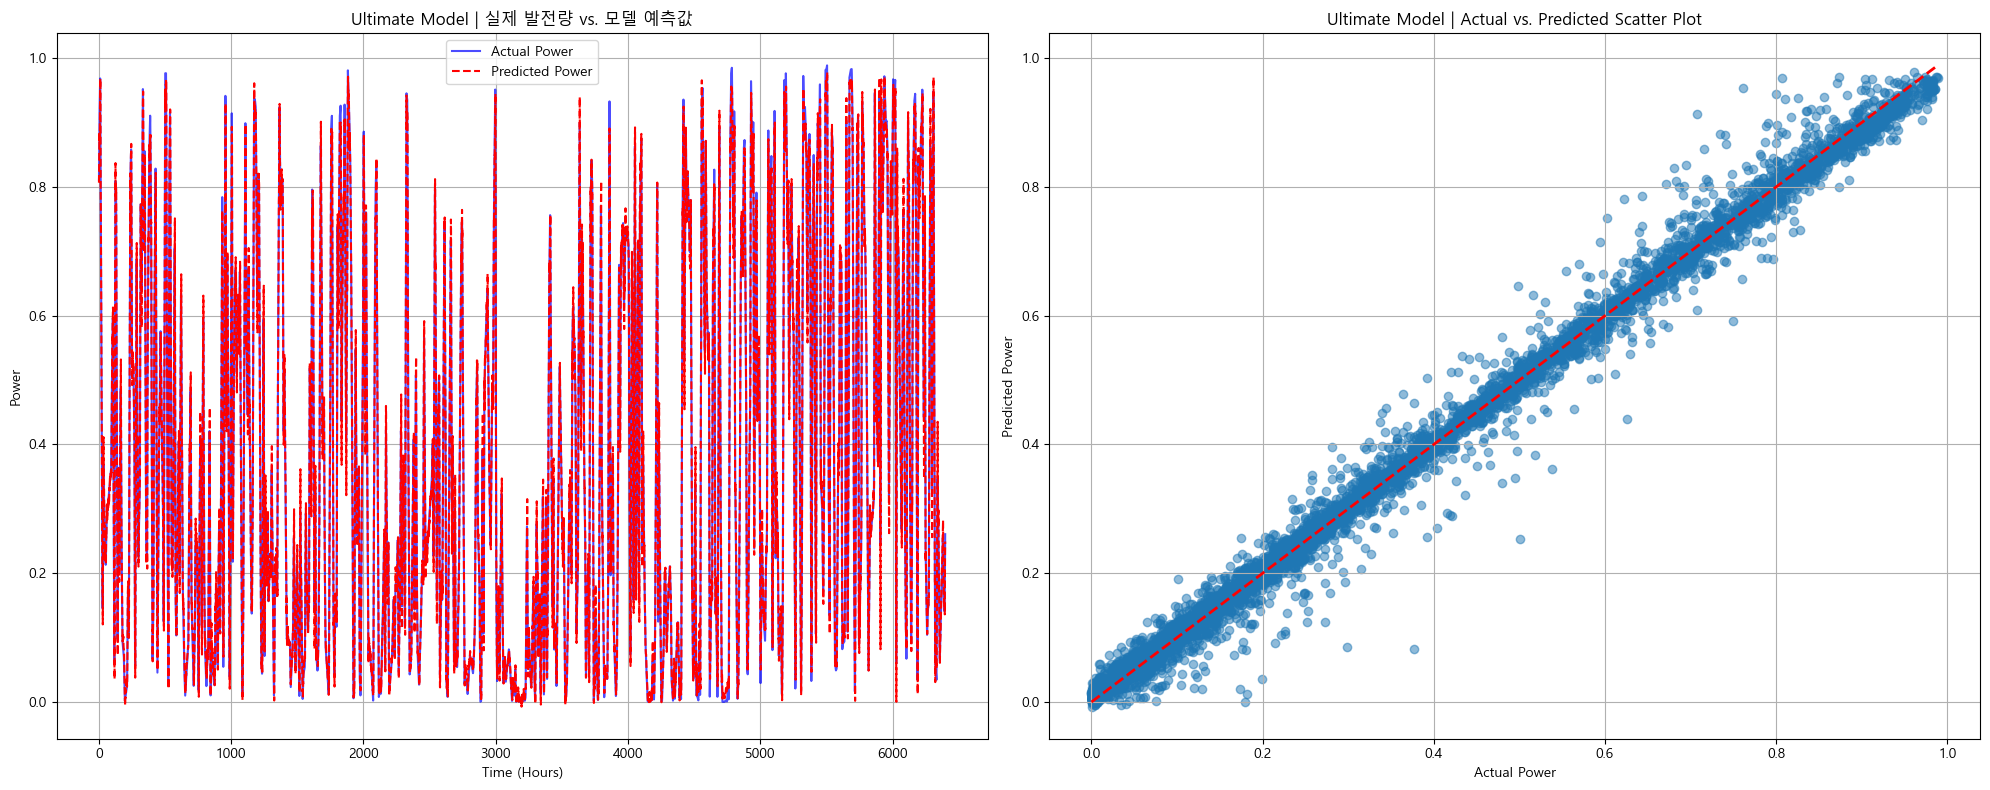

In [6]:
import time
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# --- 10. 최종 모델 학습 및 평가 ---

NUM_EPOCHS = 50
PATIENCE = 5
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path_ultimate = 'best_model_ultimate.pth'

print("--- 최종 모델(LSTM) 학습 시작 ---")
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model_ultimate.train()
    train_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")

    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_ultimate(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_iterator.set_postfix({'loss': loss.item()})
    
    avg_train_loss = train_loss / len(train_loader)

    model_ultimate.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_ultimate(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
            
    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model_ultimate.state_dict(), best_model_path_ultimate)
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter >= PATIENCE:
        print("Early stopping triggered.")
        break

end_time = time.time()
print(f"\n--- 학습 종료 (총 학습 시간: {end_time - start_time:.2f}초) ---")

# --- 최종 평가 ---
model_ultimate.load_state_dict(torch.load(best_model_path_ultimate))
print(f"최적 모델 '{best_model_path_ultimate}' 로드 완료.")

model_ultimate.eval()
all_predictions = []
all_actuals = []

with torch.no_grad():
    test_iterator = tqdm(test_loader, desc="[Final Test]")
    for inputs, labels in test_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ultimate(inputs)
        all_predictions.append(outputs.squeeze().cpu().numpy())
        all_actuals.append(labels.cpu().numpy())

predictions = np.concatenate(all_predictions)
actuals = np.concatenate(all_actuals)

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)

print("\n--- 최종 모델 최종 성능 평가 결과 ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared (결정 계수): {r2:.4f}")

# --- 결과 시각화 ---
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(actuals, label='Actual Power', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted Power', color='red', linestyle='--')
plt.title('Ultimate Model | 실제 발전량 vs. 모델 예측값')
plt.xlabel('Time (Hours)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linestyle='--', lw=2)
plt.title('Ultimate Model | Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.grid(True)

plt.tight_layout()
plt.show()